# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3
### Due Date: Sunday, Jun 1st, 2025
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Alexander Patrone

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'

response = requests.get(url)

tables = pd.read_html(response.text)

<ipython-input-5-263364e66a15>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


## Answers:

1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [ ]:
len(tables)

5

In [ ]:
print("UN Forecast 2024:", tables[0].columns)
forecast2024 = tables[0]

print("Estimate 1950 and 1980:", tables[1].columns)
pop1950_1980 = tables[1]

print("Estimate 1985 and 2015:", tables[2].columns)
pop1985_2015 = tables[2]

print("Estimate 2020 and 2050:", tables[3].columns)
pop2020_2050 = tables[3]

print("Hyperlinks:", tables[4].columns) #this table contains hyperlinks to other pages

UN Forecast 2024: Index(['Country (or dependent territory)', '2024', '2030', '2050', '2100'], dtype='object')
Estimate 1950 and 1980: Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5'],
      dtype='object')
Estimate 1985 and 2015: Index(['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995',
       '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6'],
      dtype='object')
Estimate 2020 and 2050: Index(['Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030',
       '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6'],
      dtype='object')
Hyperlinks: Index(['vteLists of countries by population statistics', 'vteLists of countries by population statistics.1'], dtype='object')


2. For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [ ]:
def rename_columns(df, target_names={'%', 'Unnamed'}):
  new_columns = []

  for i, col in enumerate(df.columns):
      # Check if column is a target (exact match or partial match)
      is_target = col in target_names or any(t in col for t in target_names)
      if is_target:
          prev_col = df.columns[i - 1] if i > 0 else 'START'
          next_col = df.columns[i + 1] if i < len(df.columns) - 1 else 'END'
          new_name = f"Avg_Annual_Growth_from_{prev_col}_and_{next_col}".replace(' ', '_')
          new_columns.append(new_name)
      else:
          new_columns.append(col)

  df_renamed = df.copy()
  df_renamed.columns = new_columns
  return df_renamed

In [ ]:
forecast2024 = rename_columns(forecast2024)
pop1950_1980 = rename_columns(pop1950_1980)
pop1985_2015 = rename_columns(pop1985_2015)
pop2020_2050 = rename_columns(pop2020_2050)

In [ ]:
print("UN Forecast 2024:", forecast2024.columns)
print("Estimate 1950 and 1980:", pop1950_1980.columns)
print("Estimate 1985 and 2015:", pop1985_2015.columns)
print("Estimate 2020 and 2050:", pop2020_2050.columns)

UN Forecast 2024: Index(['Country (or dependent territory)', '2024', '2030', '2050', '2100'], dtype='object')
Estimate 1950 and 1980: Index(['Country (or dependent territory)', '1950', '1955',
       'Avg_Annual_Growth_from_1955_and_1960', '1960',
       'Avg_Annual_Growth_from_1960_and_1965', '1965',
       'Avg_Annual_Growth_from_1965_and_1970', '1970',
       'Avg_Annual_Growth_from_1970_and_1975', '1975',
       'Avg_Annual_Growth_from_1975_and_1980', '1980',
       'Avg_Annual_Growth_from_1980_and_END'],
      dtype='object')
Estimate 1985 and 2015: Index(['Country (or dependent territory)', '1985',
       'Avg_Annual_Growth_from_1985_and_1990', '1990',
       'Avg_Annual_Growth_from_1990_and_1995', '1995',
       'Avg_Annual_Growth_from_1995_and_2000', '2000',
       'Avg_Annual_Growth_from_2000_and_2005', '2005',
       'Avg_Annual_Growth_from_2005_and_2010', '2010',
       'Avg_Annual_Growth_from_2010_and_2015', '2015',
       'Avg_Annual_Growth_from_2015_and_END'],
      dtype

3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [ ]:
#pop1950_1980.set_index('Country (or dependent territory)', inplace=True)
pop1985_2015.set_index('Country (or dependent territory)', inplace=True)
pop2020_2050.set_index('Country (or dependent territory)', inplace=True)

In [ ]:
combined_df = pd.concat([pop1950_1980, pop1985_2015, pop2020_2050], axis=1)
combined_df

1950     1955  \
Country (or dependent territory)                     
Afghanistan                          8151     8892   
Albania                              1228     1393   
Algeria                              8893     9842   
American Samoa                         20       20   
Andorra                                 7        7   
...                                   ...      ...   
Western Sahara                         10       16   
Yemen                                4778     5266   
Zambia                               2554     2870   
Zimbabwe                             2854     3410   
World                             2557629  2782099   

                                  Avg_Annual_Growth_from_1955_and_1960  \
Country (or dependent territory)                                         
Afghanistan                                                       1.76   
Albania                                                           2.56   
Algeria                                                           2.05   
American Samoa                                                    0.72   
Andorra                                                           0.04   
...                                                                ...   
Western Sahara                                                   11.87   
Yemen                                                             1.97   
Zambia                                                            2.36   
Zimbabwe                                                          3.62   
World                                                             1.70   

                                     1960  \
Country (or dependent territory)            
Afghanistan                          9830   
Albania                              1624   
Algeria                             10910   
American Samoa                         21   
Andorra                                 9   
...                                   ...   
Western Sahara                         28   
Yemen                                5872   
Zambia                               3255   
Zimbabwe                             4011   
World                             3043002   

                                  Avg_Annual_Growth_from_1960_and_1965  \
Country (or dependent territory)                                         
Afghanistan                                                       2.03   
Albania                                                           3.12   
Algeria                                                           2.08   
American Samoa                                                    0.20   
Andorra                                                           6.28   
...                                                                ...   
Western Sahara                                                   11.87   
Yemen                                                             2.20   
Zambia                                                            2.55   
Zimbabwe                                                          3.31   
World                                                             1.81   

                                     1965  \
Country (or dependent territory)            
Afghanistan                         10998   
Albania                              1884   
Algeria                             11964   
American Samoa                         25   
Andorra                                14   
...                                   ...   
Western Sahara                         50   
Yemen                                6511   
Zambia                               3695   
Zimbabwe                             4686   
World                             3350426   

                                  Avg_Annual_Growth_from_1965_and_1970  \
Country (or dependent territory)                                         
Afghanistan                                                       2.27   
Albania       

In [ ]:
combined_df.shape

(228, 41)

4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

In [ ]:
top_10 = combined_df.sort_values(by='1950', ascending=False).head(11)
top_10 = top_10.iloc[1:]
top_10

1950    1955  \
Country (or dependent territory)                   
China                             562580  607047   
India                             369881  404268   
United States                     151869  165070   
Russia                            101937  111126   
Japan                              83806   89816   
Indonesia                          82979   90255   
Germany                            68375   70196   
Brazil                             53444   61652   
United Kingdom                     50128   50947   
Italy                              47106   48634   

                                  Avg_Annual_Growth_from_1955_and_1960  \
Country (or dependent territory)                                         
China                                                             1.53   
India                                                             1.79   
United States                                                     1.68   
Russia                                                            1.74   
Japan                                                             1.39   
Indonesia                                                         1.70   
Germany                                                           0.53   
Brazil                                                            2.90   
United Kingdom                                                    0.32   
Italy                                                             0.64   

                                    1960  \
Country (or dependent territory)           
China                             651340   
India                             445394   
United States                     179980   
Russia                            119632   
Japan                              94092   
Indonesia                         100146   
Germany                            72481   
Brazil                             71412   
United Kingdom                     52373   
Italy                              50198   

                                  Avg_Annual_Growth_from_1960_and_1965  \
Country (or dependent territory)                                         
China                                                             1.42   
India                                                             1.96   
United States                                                     1.74   
Russia                                                            1.49   
Japan                                                             0.93   
Indonesia                                                         2.10   
Germany                                                           0.64   
Brazil                                                            2.98   
United Kingdom                                                    0.55   
Italy                                                             0.64   

                                    1965  \
Country (or dependent territory)           
China                             716667   
India                             494964   
United States                     193527   
Russia                            126542   
Japan                              98883   
Indonesia                         110754   
Germany                            75639   
Brazil                             82602   
United Kingdom                     54351   
Italy                              51988   

                                  Avg_Annual_Growth_from_1965_and_1970  \
Country (or dependent territory)                                         
China                                                             1.93   
India                                                             2.13   
United States                                                     1.46   
Russia                                                            1.13   
Japan                                                             1.00   
Indonesia                                                

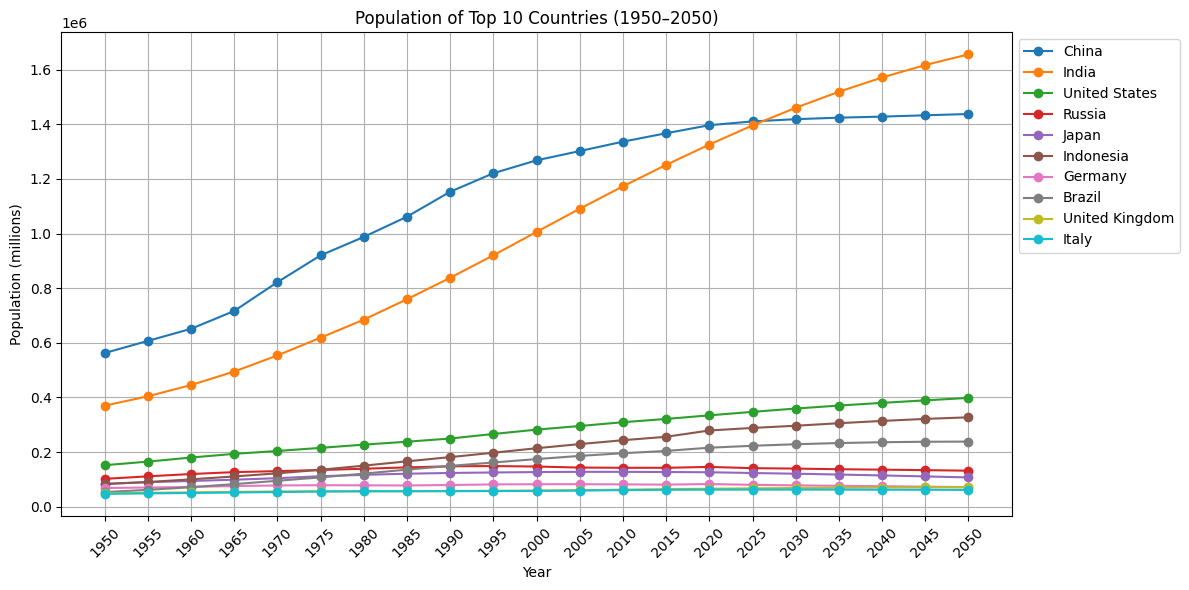

In [ ]:
years = [str(year) for year in range(1950, 2051, 5)]

plt.figure(figsize=(12, 6))

for country in top_10.index:
    plt.plot(years, top_10.loc[country, years], marker='o', label=country)

plt.title("Population of Top 10 Countries (1950–2050)")
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

SyntaxError: invalid syntax (<ipython-input-57-6ccb83da1dd4>, line 1)

6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

In [ ]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Unknown'

combined_df['Country'] = combined_df['Country (or dependent territory)'].astype(str)

# Add continent column
df['Continent'] = df['Country'].apply(country_to_continent)

# Optional: Drop rows with unknown continent
df = df[df['Continent'] != 'Unknown']

7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Answers:

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [ ]:
import requests
import pandas as pd

# Step 1: Fetch JSON data from the API
url = "https://yuan-json-api.vercel.app/nobelprize/laureates"
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    data = response.json()
else:
    raise Exception(f"API request failed with status code {response.status_code}")

# Step 2: Normalize the nested JSON into flat format
laureates = pd.json_normalize(data["laureates"], record_path=["nobelPrizes", "affiliations"],
                              meta=[
                                  "id", "knownName.en", "givenName.en", "familyName.en", "gender",
                                  ["nobelPrizes", "awardYear"],
                                  ["nobelPrizes", "category.en"],
                                  ["nobelPrizes", "dateAwarded"],
                                  ["nobelPrizes", "prizeStatus"],
                                  ["nobelPrizes", "motivation.en"]
                              ],
                              errors="ignore")

# Step 3: Rename columns for readability
laureates.columns = [col.replace("nobelPrizes.", "") for col in laureates.columns]

# Step 4: Count unique laureates by their 'id'
num_unique_laureates = laureates['id'].nunique()

# Show result
print(f"Number of unique laureates: {num_unique_laureates}")
laureates.head()

KeyError: 'nobelPrizes'

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


In [ ]:
#method 1


3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

## Answers:

1. How many rows contain missing values?

2. How many columns contain missing values?

3. List the numbers of missing values for all columns.

4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

5. Show there is no missing value after filling up.

6. Plot the histogram of the value `relative_humidity_3pm`.

7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

* 0.00 - 11.59, 15 minutes averages, average over 20 days

5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

## Answers:

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?


3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data

6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?